In [2]:
import pandas as pd
from fbprophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import numpy as np

In [7]:
quiz_df = pd.read_csv('household_power_consumption.zip',sep=';',parse_dates={'date':['Date','Time']},index_col=['date']
                      ,low_memory=False)
quiz_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [8]:
quiz_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
date_time_df = pd.to_datetime(quiz_df.Date + ' ' + quiz_df.Time),columns='DateTime'

TypeError: Index(...) must be called with a collection of some kind, 'DateTime' was passed

In [10]:
for col in quiz_df.columns:
    quiz_df[col] = pd.to_numeric(quiz_df[col],errors='coerce')

In [13]:
av = quiz_df['Global_active_power'].mean()
print(av)

1.091615036500693


In [14]:
for col in quiz_df.columns:
    quiz_df[col].fillna(quiz_df[col].mean(),inplace=True)

In [16]:
quiz_df.iloc[6839]

Global_active_power        1.091615
Global_reactive_power      0.123714
Voltage                  240.839858
Global_intensity           4.627759
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
Name: 2006-12-21 11:23:00, dtype: float64

In [21]:
resampled = quiz_df.resample('D').mean()
print(resampled)

            Global_active_power  Global_reactive_power     Voltage  \
date                                                                 
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308063   
...                         ...                    ...         ...   
2010-12-07             0.770538               0.198550  240.218646   
2010-12-08             0.367846               0.117429  240.794931   
2010-12-09             1.119508               0.139832  241.619722   
2010-12-10             1.097008               0.118242  240.260674   
2010-12-11             1.275571               0.104961  238.837896   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
date      

In [22]:
resampled.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.036001,0.111562,0.999182,0.537367,0.477530,0.733220
Global_reactive_power,0.036001,1.000000,-0.059897,0.057564,0.318835,0.181222,0.031286
Voltage,0.111562,-0.059897,1.000000,0.085787,-0.073601,-0.080416,0.168036
Global_intensity,0.999182,0.057564,0.085787,1.000000,0.549419,0.486557,0.724682
Sub_metering_1,0.537367,0.318835,-0.073601,0.549419,1.000000,0.251086,0.305883
Sub_metering_2,0.477530,0.181222,-0.080416,0.486557,0.251086,1.000000,0.197472
Sub_metering_3,0.733220,0.031286,0.168036,0.724682,0.305883,0.197472,1.000000


In [23]:
quiz_df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [25]:
resampled2 = quiz_df.resample('D').sum()
resampled2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0


In [26]:
resampled2.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.127081,0.265571,0.999220,0.550647,0.486537,0.749872
Global_reactive_power,0.127081,1.000000,0.349670,0.148791,0.333737,0.201664,0.119110
Voltage,0.265571,0.349670,1.000000,0.269229,0.100150,0.086008,0.263642
Global_intensity,0.999220,0.148791,0.269229,1.000000,0.562513,0.495339,0.742301
Sub_metering_1,0.550647,0.333737,0.100150,0.562513,1.000000,0.258569,0.323297
Sub_metering_2,0.486537,0.201664,0.086008,0.495339,0.258569,1.000000,0.213949
Sub_metering_3,0.749872,0.119110,0.263642,0.742301,0.323297,0.213949,1.000000


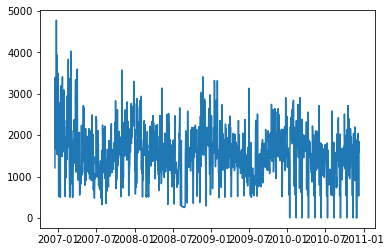

In [27]:
plt.plot(resampled2.index, resampled2.Global_active_power)
plt.show()

In [28]:
resampled2.reset_index(inplace=True)
resampled2

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1452,2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [47]:
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [35]:
resampled2.rename(columns={'date':'ds','Global_active_power':'y'},inplace=True)
x_train = resampled2[:1092]
x_test = resampled2[1092:]

In [75]:
y_train = x_train[['ds','y']]
model = Prophet()
model.fit(y_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future = model.make_future_dataframe(periods=365,include_history=False)
future

,ds
0,2009-12-12
1,2009-12-13
2,2009-12-14
3,2009-12-15
4,2009-12-16
...,...
360,2010-12-07
361,2010-12-08
362,2010-12-09
363,2010-12-10


In [76]:
y_predict = model.predict(future)
y_predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1531.046282,1234.452948,2651.701731,1531.046282,1531.046282,447.754537,447.754537,447.754537,149.612126,149.612126,149.612126,298.142412,298.142412,298.142412,0.0,0.0,0.0,1978.800820
1,2009-12-13,1530.994786,1291.098774,2685.979716,1530.994786,1530.994786,446.244722,446.244722,446.244722,138.201754,138.201754,138.201754,308.042968,308.042968,308.042968,0.0,0.0,0.0,1977.239508
2,2009-12-14,1530.943290,991.611415,2479.633035,1530.943290,1530.943290,218.301583,218.301583,218.301583,-101.328343,-101.328343,-101.328343,319.629926,319.629926,319.629926,0.0,0.0,0.0,1749.244873
3,2009-12-15,1530.891794,1142.054931,2599.665884,1530.891794,1530.891794,334.328347,334.328347,334.328347,1.644298,1.644298,1.644298,332.684049,332.684049,332.684049,0.0,0.0,0.0,1865.220141
4,2009-12-16,1530.840298,1065.597462,2552.745429,1530.840298,1530.840298,309.806445,309.806445,309.806445,-37.132301,-37.132301,-37.132301,346.938746,346.938746,346.938746,0.0,0.0,0.0,1840.646743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-12-07,1512.507713,1070.543178,2485.896107,1507.792968,1517.381356,279.592580,279.592580,279.592580,1.644298,1.644298,1.644298,277.948282,277.948282,277.948282,0.0,0.0,0.0,1792.100292
361,2010-12-08,1512.456217,1038.685461,2447.424575,1507.729735,1517.368516,240.505179,240.505179,240.505179,-37.132301,-37.132301,-37.132301,277.637480,277.637480,277.637480,0.0,0.0,0.0,1752.961395
362,2010-12-09,1512.404720,968.864940,2409.182038,1507.668210,1517.336635,166.423652,166.423652,166.423652,-112.801984,-112.801984,-112.801984,279.225636,279.225636,279.225636,0.0,0.0,0.0,1678.828373
363,2010-12-10,1512.353224,1032.667073,2436.199469,1507.602918,1517.304808,244.603825,244.603825,244.603825,-38.195550,-38.195550,-38.195550,282.799376,282.799376,282.799376,0.0,0.0,0.0,1756.957050


In [52]:
y_pred = y_predict['yhat']
y_pred

0      1978.800820
1      1977.239508
2      1749.244873
3      1865.220141
4      1840.646743
          ...     
360    1792.100292
361    1752.961395
362    1678.828373
363    1756.957050
364    1950.299711
Name: yhat, Length: 365, dtype: float64

In [43]:
y_test = x_test.pop('y')
y_test

1092    1816.380
1093    2138.814
1094    1794.862
1095    1940.116
1096    1394.874
          ...   
1452    1109.574
1453     529.698
1454    1612.092
1455    1579.692
1456    1836.822
Name: y, Length: 365, dtype: float64

In [53]:
round(mean_absolute_percentage_error(y_test,y_pred)*100,2)

2.9306617307023938e+19

In [54]:
np.sqrt(mean_squared_error(y_test,y_pred))

562.2423679391367

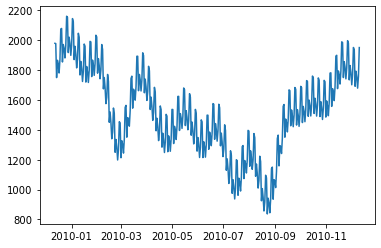

In [56]:
plt.plot(y_predict.ds,y_predict.yhat)
plt.show()

In [57]:
resampled2

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1452,2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [77]:
multiv_df = resampled2.rename(columns={'Global_reactive_power':'add1','Voltage':'add2','Global_intensity':'add3',
                                      'Sub_metering_1':'add4','Sub_metering_2':'add5','Sub_metering_3':'add6'})
x_train = multiv_df[:1092]
x_test = multiv_df[1092:]
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
model2.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
x_test

,ds,y,add1,add2,add3,add4,add5,add6
1092,2009-12-12,1816.380,248.730,352712.09,7576.2,1087.0,4120.0,8198.0
1093,2009-12-13,2138.814,222.190,352076.54,8877.4,3984.0,417.0,13178.0
1094,2009-12-14,1794.862,151.982,354454.29,7376.0,1090.0,2280.0,10742.0
1095,2009-12-15,1940.116,162.344,354302.18,7941.0,1111.0,392.0,14084.0
1096,2009-12-16,1394.874,154.430,355990.85,5750.4,1143.0,2943.0,8104.0
...,...,...,...,...,...,...,...,...
1452,2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [84]:
# future = model2.make_future_dataframe(365,include_history=False)
future = x_test.drop(columns=['y'])
future

,ds,add1,add2,add3,add4,add5,add6
1092,2009-12-12,248.730,352712.09,7576.2,1087.0,4120.0,8198.0
1093,2009-12-13,222.190,352076.54,8877.4,3984.0,417.0,13178.0
1094,2009-12-14,151.982,354454.29,7376.0,1090.0,2280.0,10742.0
1095,2009-12-15,162.344,354302.18,7941.0,1111.0,392.0,14084.0
1096,2009-12-16,154.430,355990.85,5750.4,1143.0,2943.0,8104.0
...,...,...,...,...,...,...,...
1452,2010-12-07,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [85]:
y_predict = model2.predict(future)
y_predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1587.358363,1770.047573,1807.914577,1587.358363,1587.358363,-19.271868,-19.271868,-19.271868,2.922888,...,1.647412,1.647412,1.647412,6.630852,6.630852,6.630852,0.0,0.0,0.0,1789.476630
1,2009-12-13,1587.371454,2095.268799,2133.369895,1587.371454,1587.371454,-12.278394,-12.278394,-12.278394,2.638121,...,1.242856,1.242856,1.242856,7.383687,7.383687,7.383687,0.0,0.0,0.0,2115.021155
2,2009-12-14,1587.384546,1751.414994,1788.970733,1587.384546,1587.384546,6.221898,6.221898,6.221898,3.703504,...,-1.115615,-1.115615,-1.115615,8.157507,8.157507,8.157507,0.0,0.0,0.0,1771.357309
3,2009-12-15,1587.397637,1892.215639,1929.571126,1587.397637,1587.397637,3.491440,3.491440,3.491440,3.635349,...,-1.517613,-1.517613,-1.517613,8.940281,8.940281,8.940281,0.0,0.0,0.0,1911.074442
4,2009-12-16,1587.410728,1361.591709,1399.306990,1587.410728,1587.410728,5.576834,5.576834,5.576834,4.391981,...,1.501311,1.501311,1.501311,9.719257,9.719257,9.719257,0.0,0.0,0.0,1380.041744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-12-07,1592.071239,1037.149368,1216.441618,1502.063493,1678.827373,-29.069581,-29.069581,-29.069581,-0.122708,...,-1.517613,-1.517613,-1.517613,3.412769,3.412769,3.412769,0.0,0.0,0.0,1128.686331
361,2010-12-08,1592.084330,454.787176,638.709716,1501.776395,1679.038121,1.711714,1.711714,1.711714,0.249117,...,1.501311,1.501311,1.501311,3.901453,3.901453,3.901453,0.0,0.0,0.0,548.239364
362,2010-12-09,1592.097422,1532.533665,1713.743660,1501.489296,1679.185664,-6.789018,-6.789018,-6.789018,0.781282,...,-0.420205,-0.420205,-0.420205,4.455514,4.455514,4.455514,0.0,0.0,0.0,1626.683800
363,2010-12-10,1592.110513,1520.034758,1701.416857,1501.059220,1679.274428,1.403411,1.403411,1.403411,-0.095591,...,-1.338145,-1.338145,-1.338145,5.069413,5.069413,5.069413,0.0,0.0,0.0,1611.559034


In [86]:
y_test = x_test['y'] 
y_pred = y_predict['yhat']
mean_absolute_percentage_error(y_test,y_pred)

2.545790211722253e+16

In [87]:
np.sqrt(mean_squared_error(y_test,y_pred))

32.089791011172295

In [100]:
weeks = y_predict.iloc[0:14]
weeks

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1587.358363,1770.047573,1807.914577,1587.358363,1587.358363,-19.271868,-19.271868,-19.271868,2.922888,...,1.647412,1.647412,1.647412,6.630852,6.630852,6.630852,0.0,0.0,0.0,1789.476630
1,2009-12-13,1587.371454,2095.268799,2133.369895,1587.371454,1587.371454,-12.278394,-12.278394,-12.278394,2.638121,...,1.242856,1.242856,1.242856,7.383687,7.383687,7.383687,0.0,0.0,0.0,2115.021155
2,2009-12-14,1587.384546,1751.414994,1788.970733,1587.384546,1587.384546,6.221898,6.221898,6.221898,3.703504,...,-1.115615,-1.115615,-1.115615,8.157507,8.157507,8.157507,0.0,0.0,0.0,1771.357309
3,2009-12-15,1587.397637,1892.215639,1929.571126,1587.397637,1587.397637,3.491440,3.491440,3.491440,3.635349,...,-1.517613,-1.517613,-1.517613,8.940281,8.940281,8.940281,0.0,0.0,0.0,1911.074442
4,2009-12-16,1587.410728,1361.591709,1399.306990,1587.410728,1587.410728,5.576834,5.576834,5.576834,4.391981,...,1.501311,1.501311,1.501311,9.719257,9.719257,9.719257,0.0,0.0,0.0,1380.041744
5,2009-12-17,1587.423819,1667.204259,1704.839082,1587.423819,1587.423819,7.015581,7.015581,7.015581,4.184393,...,-0.420205,-0.420205,-0.420205,10.481179,10.481179,10.481179,0.0,0.0,0.0,1686.642189
6,2009-12-18,1587.436911,1703.256344,1741.372722,1587.436911,1587.436911,3.998954,3.998954,3.998954,3.991295,...,-1.338145,-1.338145,-1.338145,11.212529,11.212529,11.212529,0.0,0.0,0.0,1721.630042
7,2009-12-19,1587.450002,2154.023772,2192.150215,1587.450002,1587.450002,10.009547,10.009547,10.009547,3.565254,...,1.647412,1.647412,1.647412,11.899771,11.899771,11.899771,0.0,0.0,0.0,2173.436215
8,2009-12-20,1587.463093,1113.182981,1152.146447,1587.463093,1587.474536,14.096012,14.096012,14.096012,4.533372,...,1.242856,1.242856,1.242856,12.529614,12.529614,12.529614,0.0,0.0,0.0,1133.647911
9,2009-12-21,1587.476185,1978.282735,2016.728981,1587.459953,1587.507808,0.960720,0.960720,0.960720,3.871519,...,-1.115615,-1.115615,-1.115615,13.089270,13.089270,13.089270,0.0,0.0,0.0,1998.032691


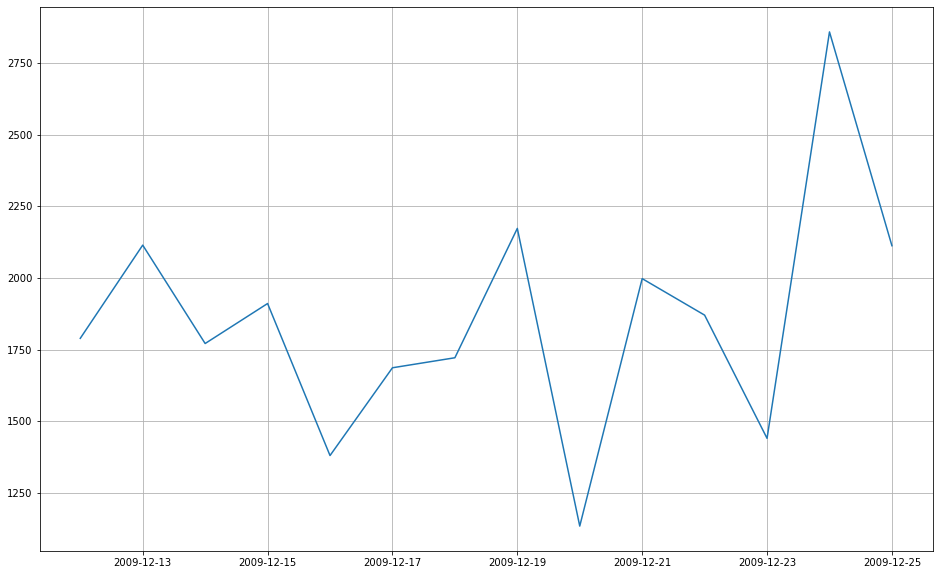

In [101]:
plt.figure(figsize=(16,10))
plt.plot(weeks.ds,weeks.yhat)
plt.grid(b=True,which='both')
plt.show()

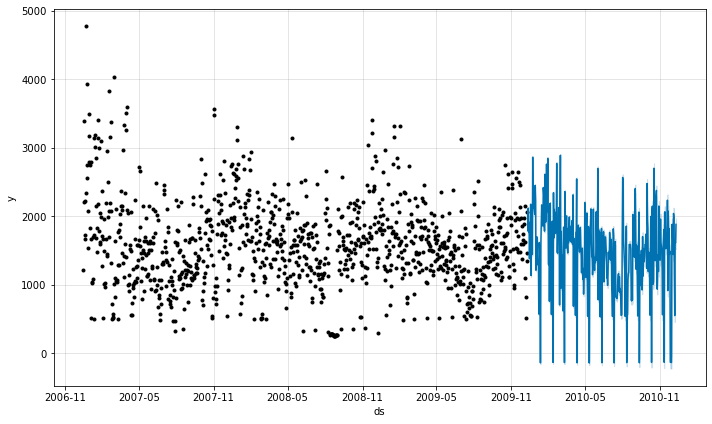

In [89]:
model.plot(y_predict)
plt.show()